# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
city= "faya"

In [4]:
city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
city_weather = requests.get(city_url).json()


In [5]:
import json
#print(json.dumps(city_weather, indent= 4, sort_keys= True))


In [7]:


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | la palma
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | cockburn harbour
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | zapolyarnyy
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | pilar
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | barabai
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | riyadh
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | kavali
Proce

Processing Record 41 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | kasane
Processing Record 47 of Set 4 | shitanjing
Processing Record 48 of Set 4 | zhezkazgan
Processing Record 49 of Set 4 | marcona
City not found. Skipping...
Processing Record 0 of Set 5 | taltal
Processing Record 1 of Set 5 | emborion
Processing Record 2 of Set 5 | garowe
Processing Record 3 of Set 5 | honningsvag
Processing Record 4 of Set 5 | progreso
Processing Record 5 of Set 5 | meulaboh
Processing Record 6 of Set 5 | henties bay
Processing Record 7 of Set 5 | bathsheba
Processing Record 8 of Set 5 | bambous virieux
Processing Record 9 of Set 5 | flinders
Processing Record 10 of Set 5 | agadez
Processing Record 11 of Set 5 | kupang
Processing Record 12 of Set 5 | boda
Processing Record 13

Processing Record 32 of Set 8 | cherskiy
Processing Record 33 of Set 8 | imuris
Processing Record 34 of Set 8 | acarau
Processing Record 35 of Set 8 | rehoboth
Processing Record 36 of Set 8 | ketchikan
Processing Record 37 of Set 8 | viedma
Processing Record 38 of Set 8 | jiexiu
Processing Record 39 of Set 8 | changji
Processing Record 40 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 8 | balagansk
Processing Record 42 of Set 8 | camana
Processing Record 43 of Set 8 | vila velha
Processing Record 44 of Set 8 | longlac
City not found. Skipping...
Processing Record 45 of Set 8 | beloha
Processing Record 46 of Set 8 | rocha
Processing Record 47 of Set 8 | namibe
Processing Record 48 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 8 | pontes e lacerda
Processing Record 0 of Set 9 | tawkar
City not found. Skipping...
Processing Record 1 of Set 9 | abu dhabi
Processing Record 2 of Set 9 | kaputa
Processing Record 3 of

Processing Record 16 of Set 12 | marquette
Processing Record 17 of Set 12 | cayenne
Processing Record 18 of Set 12 | tayu
Processing Record 19 of Set 12 | marrakesh
Processing Record 20 of Set 12 | tommot
Processing Record 21 of Set 12 | trabzon
Processing Record 22 of Set 12 | houma
Processing Record 23 of Set 12 | ossora
Processing Record 24 of Set 12 | uwayl
City not found. Skipping...
Processing Record 25 of Set 12 | ponta delgada
Processing Record 26 of Set 12 | pauini
Processing Record 27 of Set 12 | kidal
Processing Record 28 of Set 12 | firminopolis
Processing Record 29 of Set 12 | ialibu
Processing Record 30 of Set 12 | lavrentiya
Processing Record 31 of Set 12 | erzin
Processing Record 32 of Set 12 | chengde
Processing Record 33 of Set 12 | grand centre
City not found. Skipping...
Processing Record 34 of Set 12 | westport
Processing Record 35 of Set 12 | kruisfontein
Processing Record 36 of Set 12 | phek
Processing Record 37 of Set 12 | araouane
Processing Record 38 of Set 12

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,54.95,93,100,4.07,AU,1669822636
1,nanortalik,60.1432,-45.2371,29.71,84,63,15.70,GL,1669822636
2,tuktoyaktuk,69.4541,-133.0374,-2.20,84,100,8.05,CA,1669822636
3,la palma,33.8464,-118.0467,57.22,88,100,5.75,US,1669822637
4,lagoa,39.0500,-27.9833,62.28,76,0,9.26,PT,1669822637


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,54.95,93,100,4.07,AU,1669822636
1,nanortalik,60.1432,-45.2371,29.71,84,63,15.70,GL,1669822636
2,tuktoyaktuk,69.4541,-133.0374,-2.20,84,100,8.05,CA,1669822636
3,la palma,33.8464,-118.0467,57.22,88,100,5.75,US,1669822637
4,lagoa,39.0500,-27.9833,62.28,76,0,9.26,PT,1669822637


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

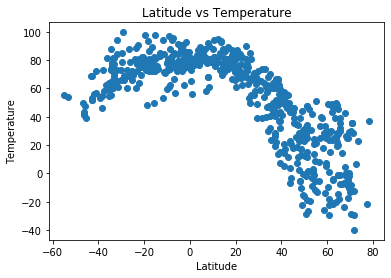

In [56]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)

plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

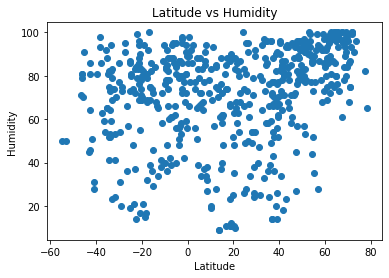

In [57]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

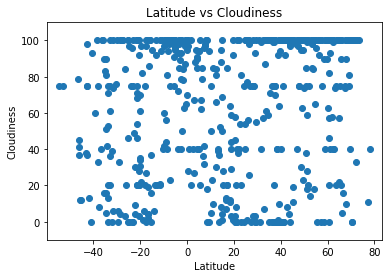

In [58]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim(min(city_data_df['Cloudiness'])-10, max(city_data_df['Cloudiness'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-5, max(city_data_df['Lat'])+5)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

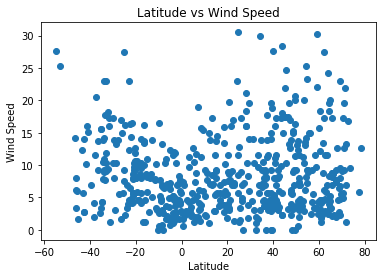

In [59]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nanortalik,60.1432,-45.2371,29.71,84,63,15.70,GL,1669822636
2,tuktoyaktuk,69.4541,-133.0374,-2.20,84,100,8.05,CA,1669822636
3,la palma,33.8464,-118.0467,57.22,88,100,5.75,US,1669822637
4,lagoa,39.0500,-27.9833,62.28,76,0,9.26,PT,1669822637
6,qaanaaq,77.4840,-69.3632,-21.48,82,11,5.84,GL,1669822638


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,54.95,93,100,4.07,AU,1669822636
5,rikitea,-23.1203,-134.9692,72.23,72,100,12.39,PF,1669822638
9,sao joao da barra,-21.6403,-41.0511,78.89,85,100,16.51,BR,1669822641
10,pilar,-9.5972,-35.9567,80.53,78,100,7.76,BR,1669822642
11,saldanha,-33.0117,17.9442,77.05,79,36,11.90,ZA,1669822642


###  Temperature vs. Latitude Linear Regression Plot

City_ID
1      14.100420
2       1.722957
3      49.058124
4      42.140708
6      -8.951607
         ...    
553     0.373532
554    80.246051
555    26.587290
557    39.383765
559    26.745615
Name: Lat, Length: 364, dtype: float64
y = -1.33x +94.05
The r-value is: 0.6715697622243371


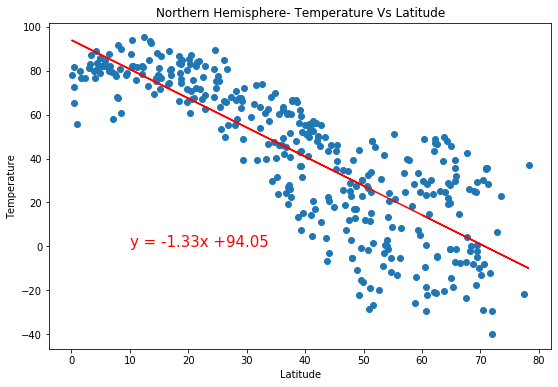

In [68]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Northern Hemisphere- Temperature Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.savefig("output_data/Fig5.png")
# Print r value
print(f"The r-value is: {rvalue**2}")

City_ID
0      65.140237
5      72.723565
9      73.464554
10     79.494157
11     67.771251
         ...    
546    81.478757
548    82.425822
550    82.960336
556    75.420667
558    83.510821
Name: Lat, Length: 196, dtype: float64
y = 0.5x +84.3
The r-value is: 0.31763453011751913


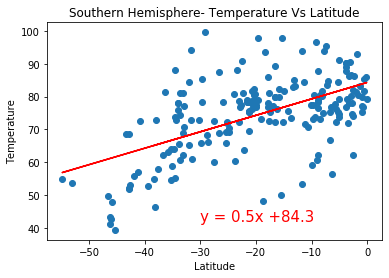

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere- Temperature Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-30,42),fontsize=15,color="red")
plt.savefig("output_data/Fig6.png")
# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** 
The coorelation between temperature and latitude is stronger in the Northern hemisphere versus the Southern hemisphere. Though the linear regression model for the northern data shows a negatvie coorelation, meaning the warmer the temperature, the lower the altitude. In contrast, the data for the south shows a positive coorleation, meaning that the warmer the temperature, the high the altitude. This is because the equator is zero, and point further north is a higher positive number, while and point further south is a lower negative number.  

### Humidity vs. Latitude Linear Regression Plot

City_ID
1      83.365396
2      87.719004
3      71.069490
4      73.502599
6      91.473639
         ...    
553    88.193646
554    60.099552
555    78.973306
557    74.472317
559    78.917617
Name: Lat, Length: 364, dtype: float64
y = 0.47x +55.24
The r-value is: 0.1719881218506458


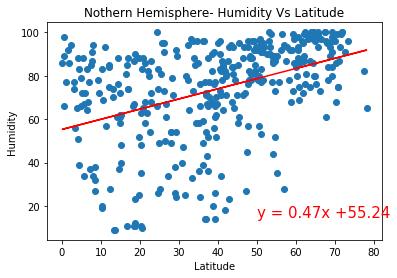

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Nothern Hemisphere- Humidity Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.savefig("output_data/Fig7.png")
# Print r value
print(f"The r-value is: {rvalue**2}")

City_ID
0      65.069455
5      68.037799
9      68.327845
10     70.688014
11     66.099313
         ...    
546    71.464847
548    71.835557
550    72.044782
556    69.093527
558    72.260258
Name: Lat, Length: 196, dtype: float64
y = 0.2x +72.57
The r-value is: 0.015782487440728465


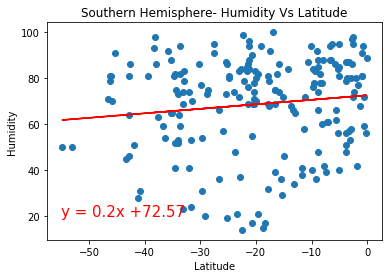

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere- Humidity Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.savefig("output_data/Fig8.png")
# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** 
The northern data has a slightly stronger coorlation between humidity and latitude, but not by much. Given the data shown and the linear regression models, humidity and latitude do not have a strong linear relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
1      76.175363
2      80.498265
3      63.966179
4      66.382127
6      84.226419
         ...    
553    80.969559
554    53.073612
555    71.814250
557    67.345006
559    71.758954
Name: Lat, Length: 364, dtype: float64
y = 0.46x +48.25
The r-value is: 0.06176406308073851


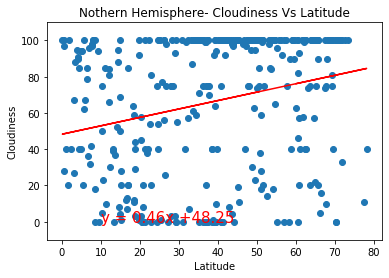

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Nothern Hemisphere- Cloudiness Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.ylim(-10, 110)
plt.savefig("output_data/Fig9.png")
# Print r value
print(f"The r-value is: {rvalue**2}")

City_ID
0      45.053435
5      59.280082
9      60.670210
10     71.982002
11     49.989329
         ...    
546    75.705197
548    77.481931
550    78.484702
556    64.339960
558    79.517435
Name: Lat, Length: 196, dtype: float64
y = 0.94x +81.0
The r-value is: 0.1181289870855262


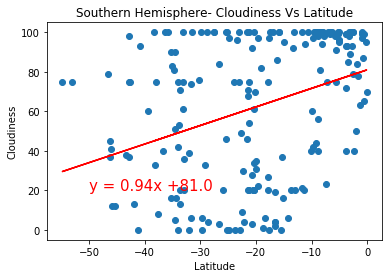

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere- Cloudiness Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.savefig("output_data/Fig10.png")
# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** Similar to the chart showing the relationship between humidity and latitude in both the norther and southern hemispheres, there is little linear coorelation between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
1       9.443815
2       9.829259
3       8.355208
4       8.570621
6      10.161672
         ...    
553     9.871281
554     7.383993
555     9.054965
557     8.656474
559     9.050035
Name: Lat, Length: 364, dtype: float64
y = 0.04x +6.95
The r-value is: 0.01877177443569333


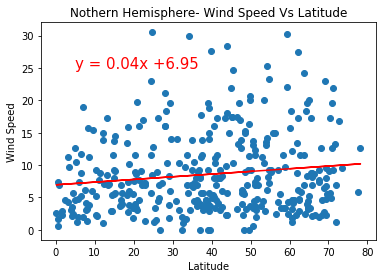

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Nothern Hemisphere- Wind Speed Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
plt.savefig("output_data/Fig11.png")
# Print r value
print(f"The r-value is: {rvalue**2}")

City_ID
0      11.402823
5       8.795759
9       8.541015
10      6.468103
11     10.498310
         ...    
546     5.785819
548     5.460229
550     5.276469
556     7.868525
558     5.087218
Name: Lat, Length: 196, dtype: float64
y = -0.17x +4.82
The r-value is: 0.17663268967596585


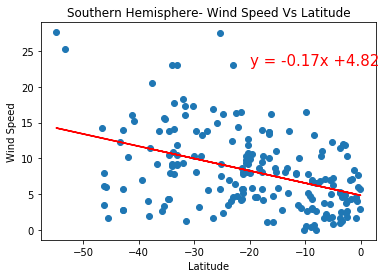

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Incorporate the other graph properties
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Southern Hemisphere- Wind Speed Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-20,23),fontsize=15,color="red")
plt.savefig("output_data/Fig12.png")
# Print r value
print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** There is little coorelation in both hemispheres between wind speed and latitude. Most cities in the north have varying wind speeds across any latitude. The wind speeds in the south get slightly slower as the latitude approaches 0.